# Heart Failure Prediction



## Introduction



### Problem
We are given 12 clinical features for predicting death events and we should create a model that predicts mortality caused by Heart Failure.


### Installing libraries

In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install plotly
!pip3 install scipy
!pip3 install imblearn

### Importing libraries
Load all the necessary dependencies which will be required for the purpose of analysis.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
from scipy import stats
import os as os
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import scipy.optimize as opt
%matplotlib inline

### Getting to know general outline of given data

In [3]:
path = os.getcwd() + '/data/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(path)
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [4]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

now let's look at the bigger picture

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


as we can see, there are no null values in our data so we don't have to treat them

# EDA (Exploratory Data Analysis)

## Univariate Analysis

### Numerical features

### Age

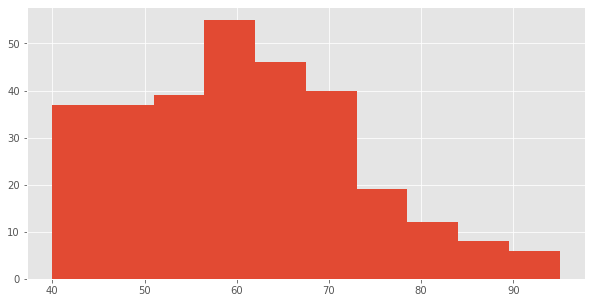

In [6]:
plt.style.use('ggplot')
df['age'].hist(figsize=(10, 5));

Skewness: 0.42306190672863536


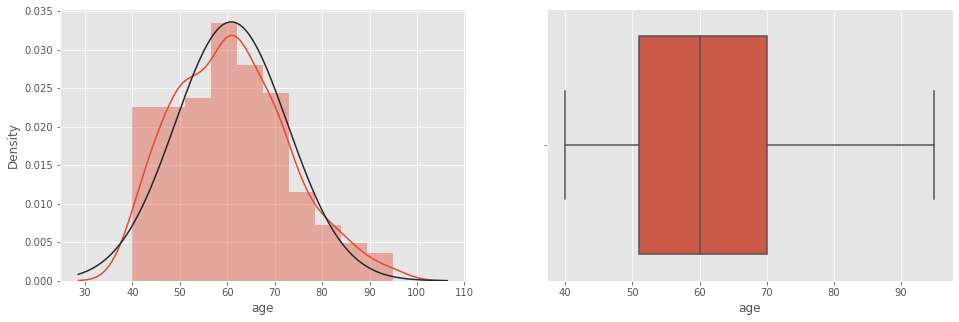

In [7]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
print("Skewness:",df['age'].skew())
sb.distplot(df['age'],fit = stats.norm);

plt.subplot(122)
sb.boxplot(df['age'])

plt.show()

we can see that patients are distributed between 40-95 with mean 60. The majority of patients are between 50-70 age and after 70 number of patients declines rapidly.

### creatinine_phosphokinase

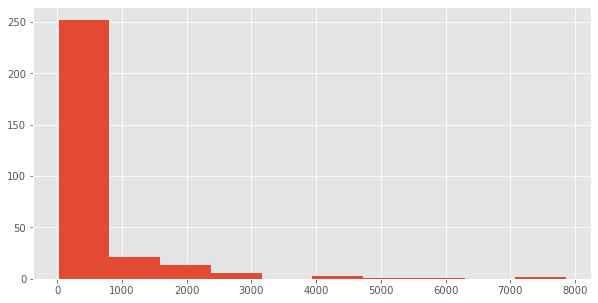

In [8]:
plt.style.use('_classic_test_patch')
df['creatinine_phosphokinase'].hist(figsize=(10, 5));

Skewness: 4.463110084653752


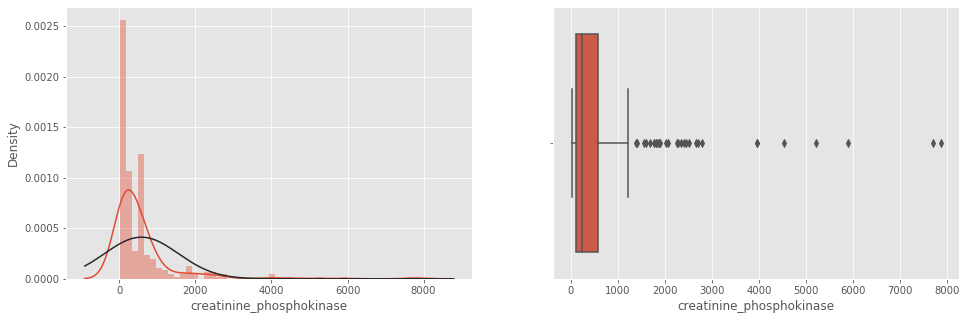

In [9]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
print("Skewness:",df['creatinine_phosphokinase'].skew())
sb.distplot(df['creatinine_phosphokinase'],fit = stats.norm);

plt.subplot(122)
sb.boxplot(df['creatinine_phosphokinase'])

plt.show()

we can see that majority of creatinine_phosphokinase is between 0-1000 with mean to 500 but there are also some outliers. And distribution is heavily right skewed 

### Ejection Fraction

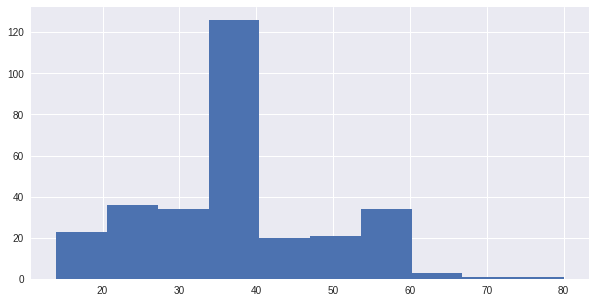

In [10]:
plt.style.use('seaborn')
df['ejection_fraction'].hist(figsize=(10, 5));

Skewness: 0.5553827516973211


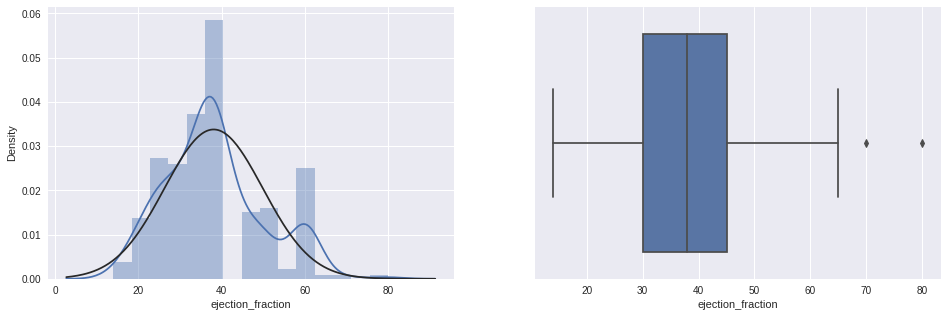

In [11]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
print("Skewness:",df['ejection_fraction'].skew())
sb.distplot(df['ejection_fraction'],fit = stats.norm);

plt.subplot(122)
sb.boxplot(df['ejection_fraction'])

plt.show()

Ejection Fraction is mainly distributed between 35-40% and data is distributed on other percents between 20-60 relatively evenly.

### platelets

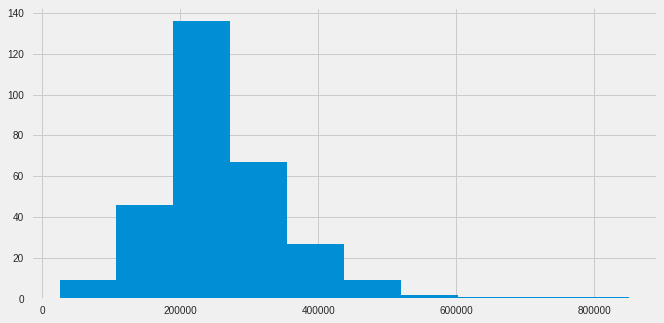

In [12]:
plt.style.use('fivethirtyeight')
df['platelets'].hist(figsize=(10, 5));

Skewness: 1.4623208382757793


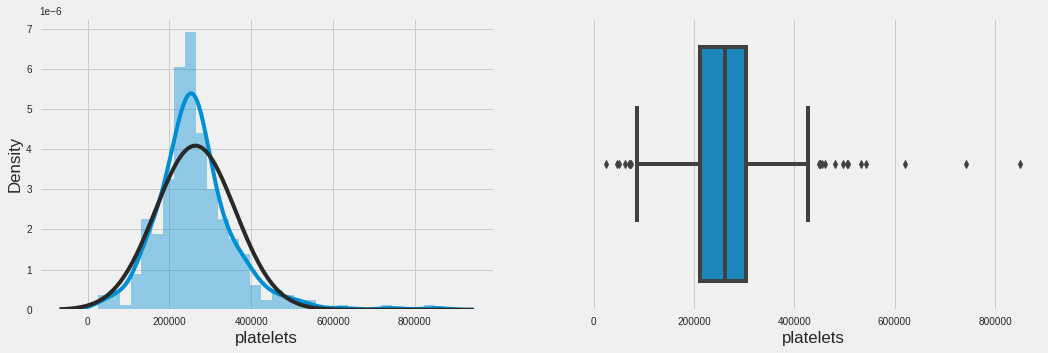

In [13]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
print("Skewness:",df['platelets'].skew())
sb.distplot(df['platelets'],fit = stats.norm);

plt.subplot(122)
sb.boxplot(df['platelets'])

plt.show()

Platelets are distributed from 25000 to 850000. Majority of them are in 200-300 thousand range. With mean 263k.

### Serum_creatinine

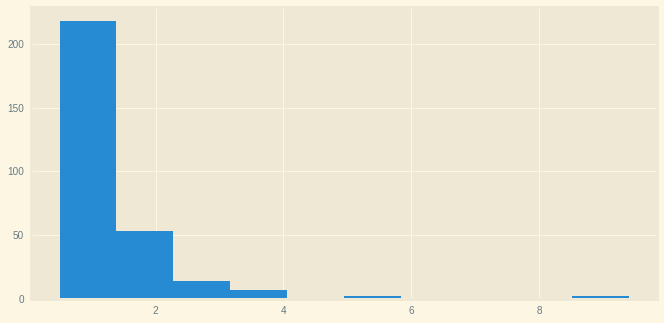

In [14]:
plt.style.use('Solarize_Light2')
df['serum_creatinine'].hist(figsize=(10, 5));

Skewness: 4.455995882049026


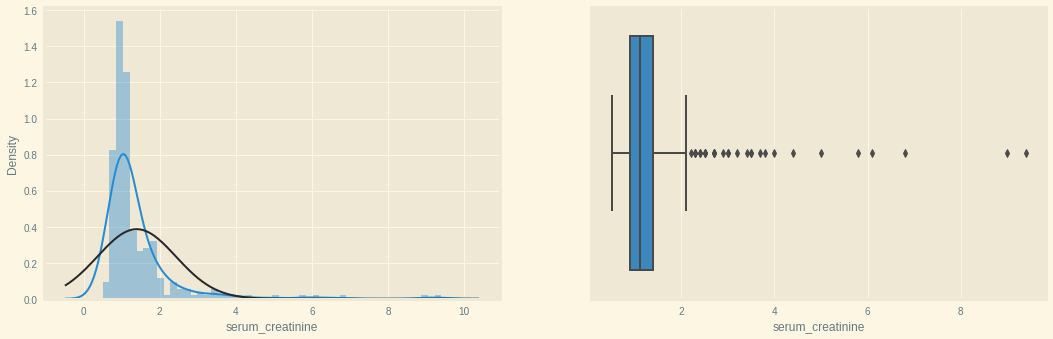

In [15]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
print("Skewness:",df['serum_creatinine'].skew())
sb.distplot(df['serum_creatinine'],fit = stats.norm);

plt.subplot(122)
sb.boxplot(df['serum_creatinine'])

plt.show()

Most of the serum_creatinine is distributed between 0-1 range and graph is heavily skewed right.

### serum_sodium

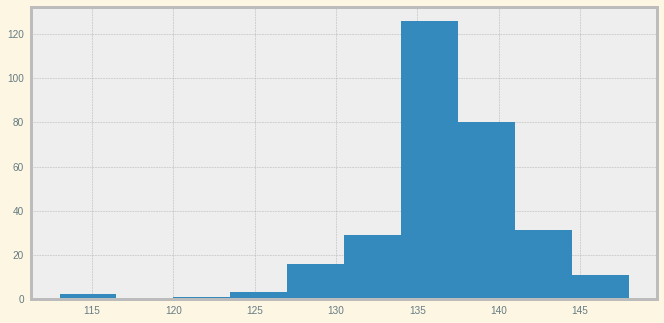

In [16]:
plt.style.use('bmh')
df['serum_sodium'].hist(figsize=(10, 5));

Skewness: -1.0481360160574988


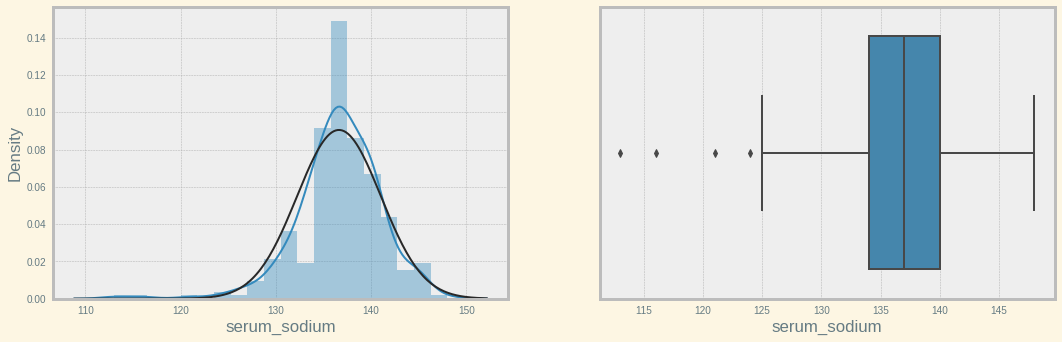

In [17]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
print("Skewness:",df['serum_sodium'].skew())
sb.distplot(df['serum_sodium'],fit = stats.norm);

plt.subplot(122)
sb.boxplot(df['serum_sodium'])

plt.show()

majority serum sodium is distributed between 130-140 but there are some outliers on the left so graph is skewed on left.

### time

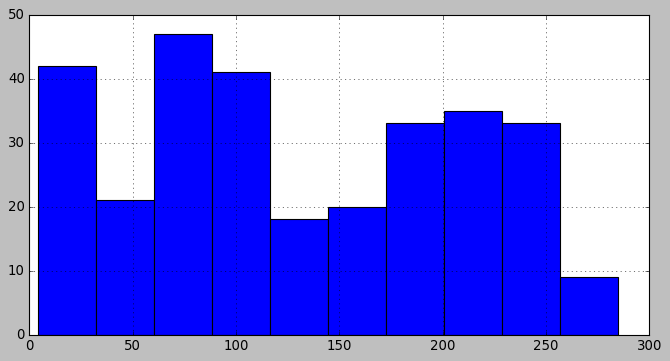

In [18]:
plt.style.use('classic')
df['time'].hist(figsize=(10, 5));

Skewness: 0.12780264559841184


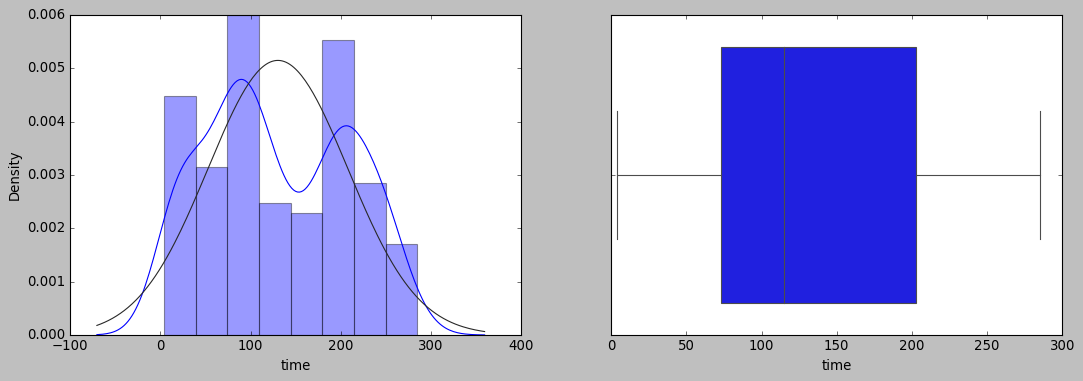

In [19]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
print("Skewness:",df['time'].skew())
sb.distplot(df['time'],fit = stats.norm);

plt.subplot(122)
sb.boxplot(df['time'])

plt.show()

Time is follow up period in days it varies from 4 to 285. graph is almost non-skewed.

### Categorical features

### anaemia

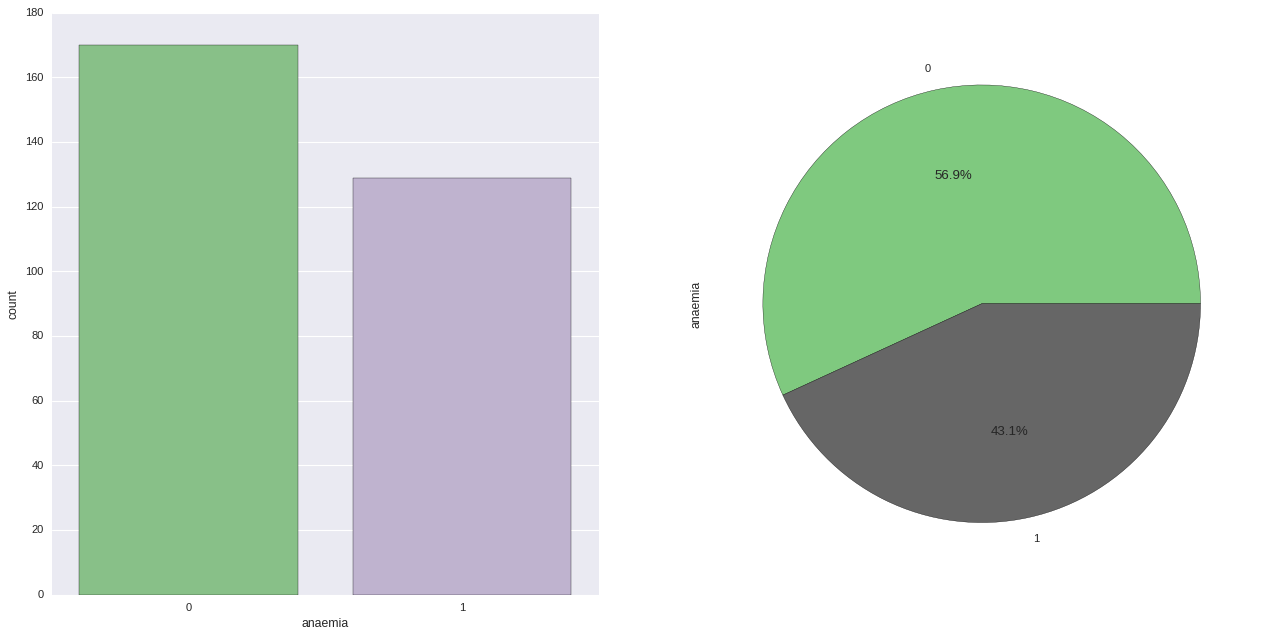

In [20]:
plt.style.use('seaborn')
plt.figure(figsize=(30, 20))
plt.subplot(235)
sb.countplot(df['anaemia'],palette="Accent")
plt.subplot(236)
df['anaemia'].value_counts().plot.pie(cmap="Accent",autopct="%1.1f%%");

57% has no anaemia and 43% has anaemia from our data.

### diabetes

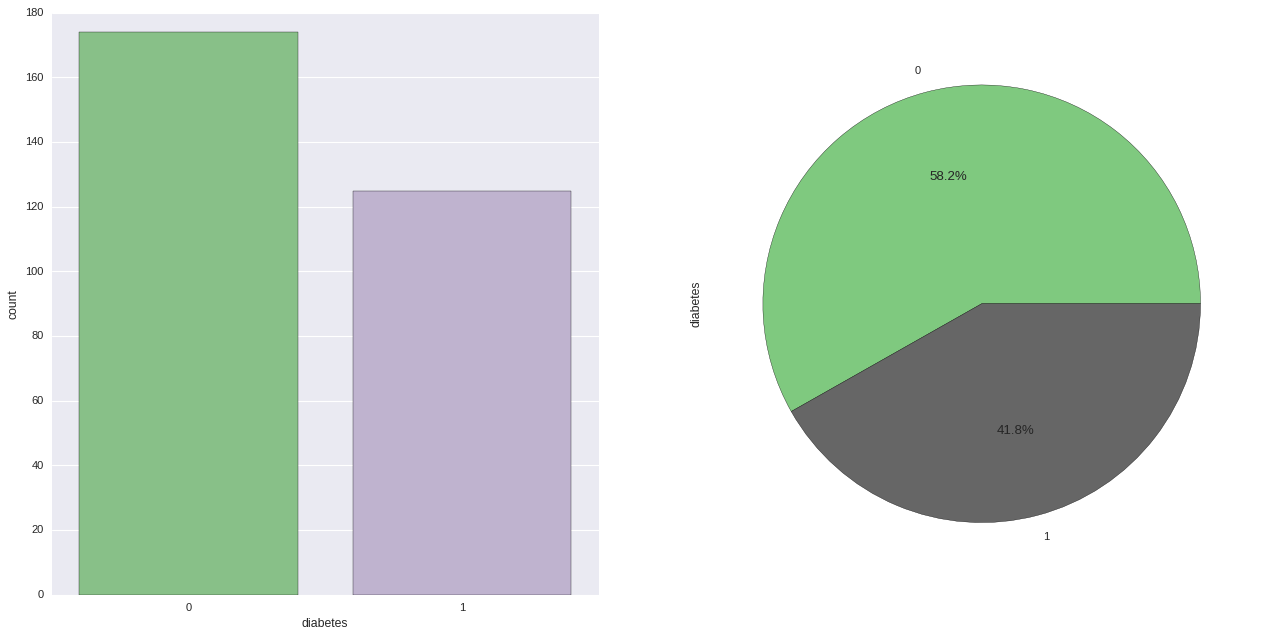

In [21]:
plt.figure(figsize=(30, 20))
plt.subplot(235)
sb.countplot(df['diabetes'],palette="Accent")
plt.subplot(236)
df['diabetes'].value_counts().plot.pie(cmap="Accent",autopct="%1.1f%%");

58% - no diabetes, 42% - diabetes.

### high_blood_pressure

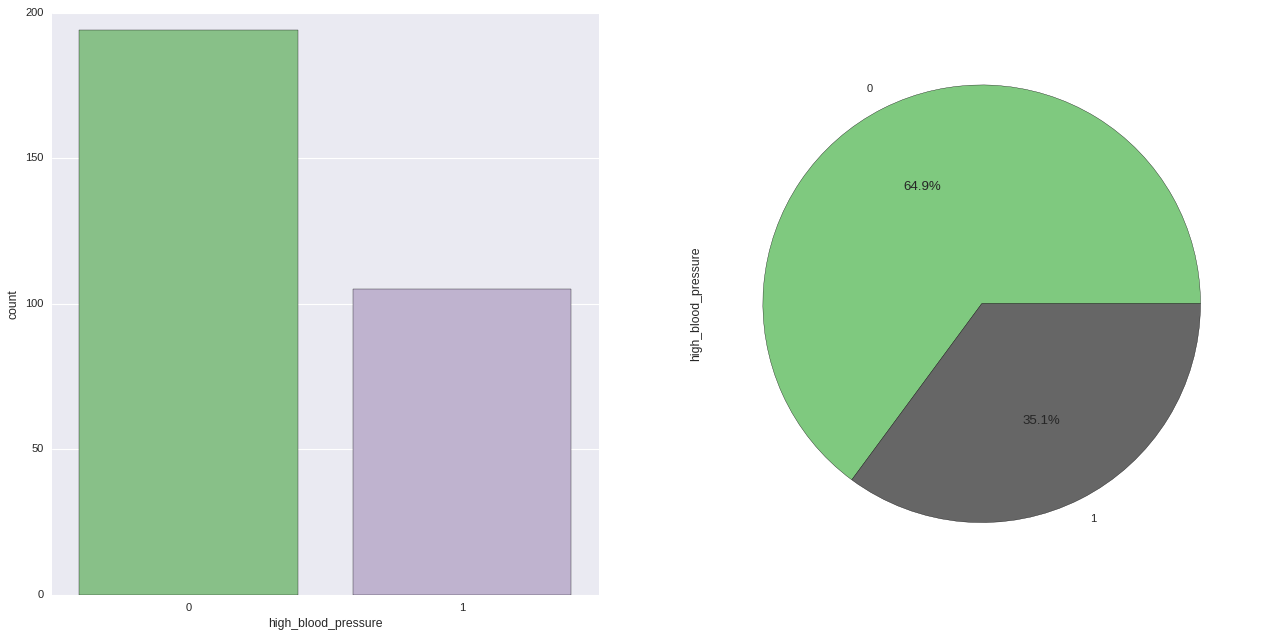

In [22]:
plt.figure(figsize=(30, 20))
plt.subplot(235)
sb.countplot(df['high_blood_pressure'],palette="Accent")
plt.subplot(236)
df['high_blood_pressure'].value_counts().plot.pie(cmap="Accent",autopct="%1.1f%%");

2/3 of patients has no high blood pressure

### sex

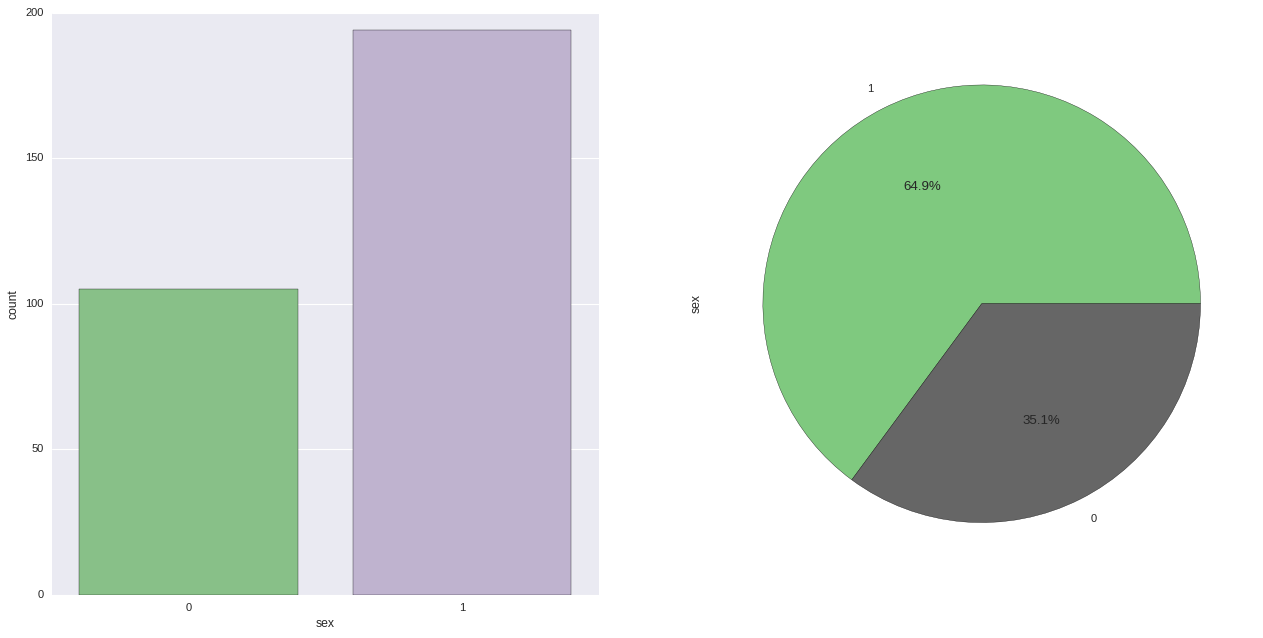

In [23]:
plt.figure(figsize=(30, 20))
plt.subplot(235)
sb.countplot(df['sex'],palette="Accent")
plt.subplot(236)
df['sex'].value_counts().plot.pie(cmap="Accent",autopct="%1.1f%%");

2/3 of patients are men

### smoking

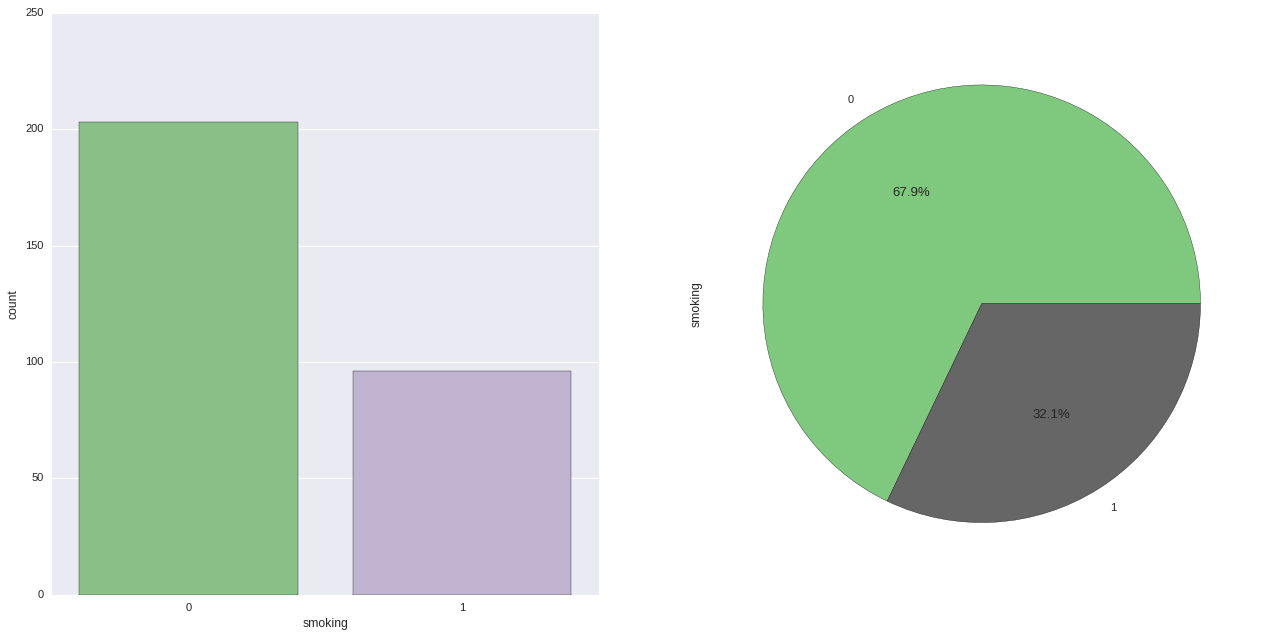

In [24]:
plt.figure(figsize=(30, 20))
plt.subplot(235)
sb.countplot(df['smoking'],palette="Accent")
plt.subplot(236)
df['smoking'].value_counts().plot.pie(cmap="Accent",autopct="%1.1f%%");

high majority, almost 70% of patients are not smoking

### DEATH_EVENT

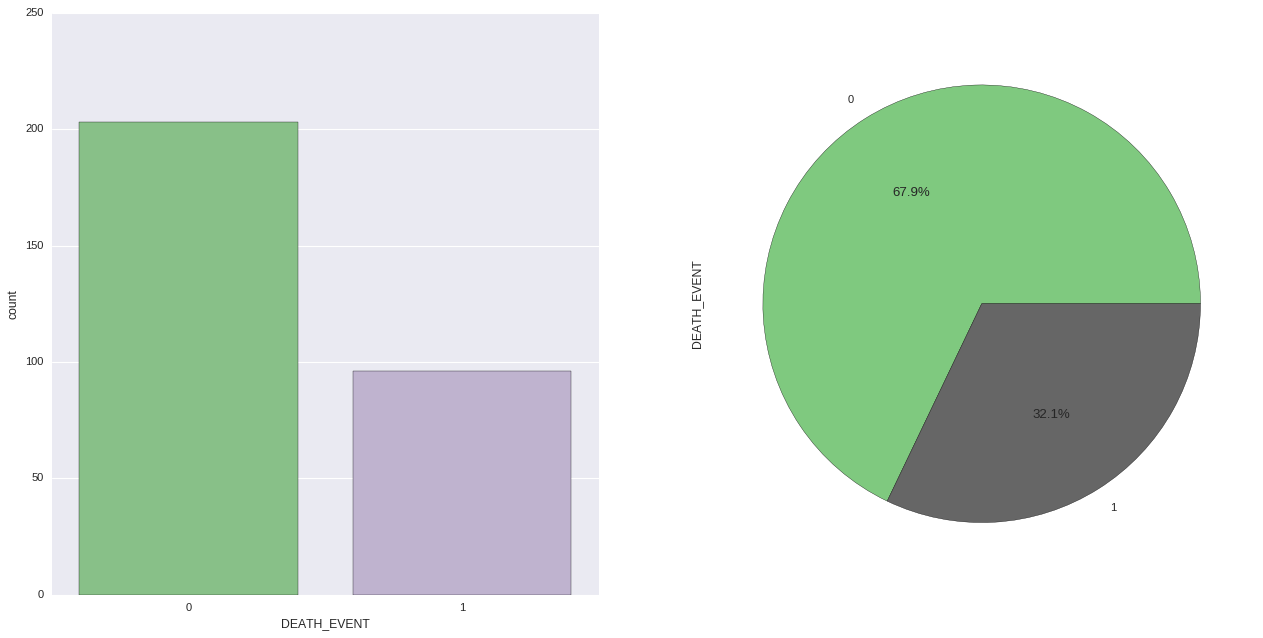

In [25]:
plt.figure(figsize=(30, 20))
plt.subplot(235)
sb.countplot(df['DEATH_EVENT'],palette="Accent")
plt.subplot(236)
df['DEATH_EVENT'].value_counts().plot.pie(cmap="Accent",autopct="%1.1f%%");

death event occurs in almost 1/3 of cases

## Multivariate Analysis

let's analyze death_event dependencies on other variables

### Age

In [26]:
figure = px.histogram(df, "age", 
        color='DEATH_EVENT',
        nbins=50, 
        title="Age Distribution with death", 
        width=700,
        height=500)
figure.show()

In [27]:
df.groupby(['DEATH_EVENT'])['age'].agg([np.mean]).T

DEATH_EVENT          0          1
mean         58.761906  65.215281

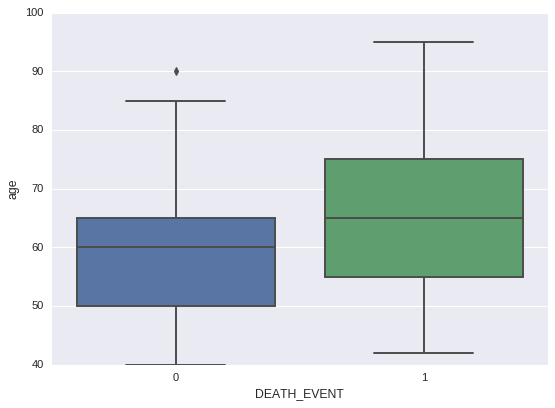

In [28]:
sb.boxplot(x = "DEATH_EVENT", y = "age", data = df);

We can infer that death event is more likely to occur in older patients

### anaemia

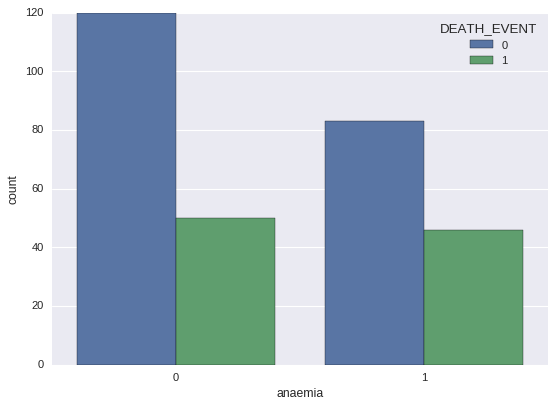

In [29]:
sb.countplot(x='anaemia', hue='DEATH_EVENT', data=df);

it seems that having anaemia doesn't have effect on death event from heart failure

### creatinine_phosphokinase

In [30]:
df.groupby(['DEATH_EVENT'])['creatinine_phosphokinase'].agg([np.mean]).T

DEATH_EVENT           0           1
mean         540.054187  670.197917

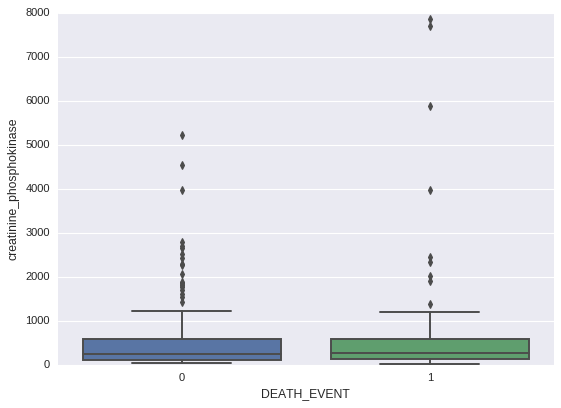

In [31]:
sb.boxplot(x = "DEATH_EVENT", y = "creatinine_phosphokinase", data = df);

cases with death event have higher mean of creatinine phospohkinase so it might be affecting chances of heart failure

### diabetes

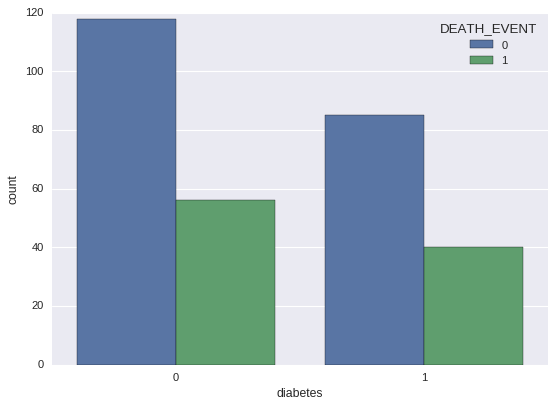

In [32]:
sb.countplot(x='diabetes', hue='DEATH_EVENT', data=df);

it seems that having diabetes doesn't have effect on death event from heart failure

### ejection_fraction

In [33]:
df.groupby(['DEATH_EVENT'])['ejection_fraction'].agg([np.mean]).T

DEATH_EVENT         0         1
mean         40.26601  33.46875

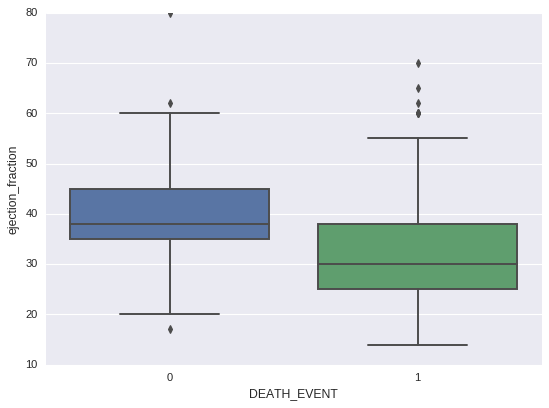

In [34]:
sb.boxplot(x = "DEATH_EVENT", y = "ejection_fraction", data = df);

death event cases had way lower ejection fraction so it should be a factor

### high_blood_pressure

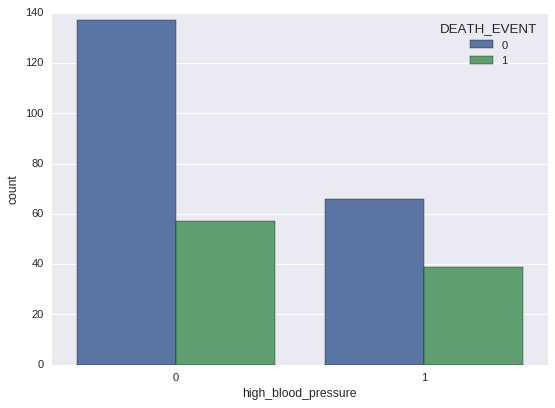

In [35]:
sb.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df);

in high blood pressure cases death event percentage is way closer to no death event percentages so having high_blood_pressure might increase chances of heart failure

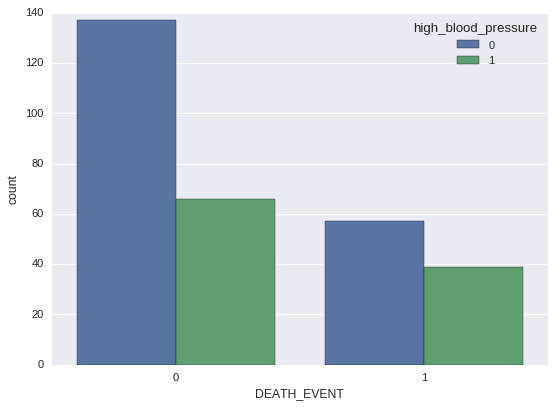

In [36]:
sb.countplot(x='DEATH_EVENT', hue='high_blood_pressure', data=df);

### platelets

In [37]:
df.groupby(['DEATH_EVENT'])['platelets'].agg([np.mean]).T

DEATH_EVENT              0              1
mean         266657.489901  256381.044792

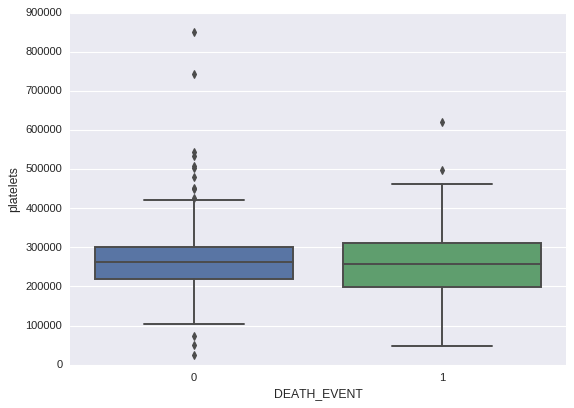

In [38]:
sb.boxplot(x = "DEATH_EVENT", y = "platelets", data = df);

It seems like platelets are pretty much uncorrelated to death event

### serum_creatinine

In [39]:
df.groupby(['DEATH_EVENT'])['serum_creatinine'].agg([np.mean]).T

DEATH_EVENT         0         1
mean         1.184877  1.835833

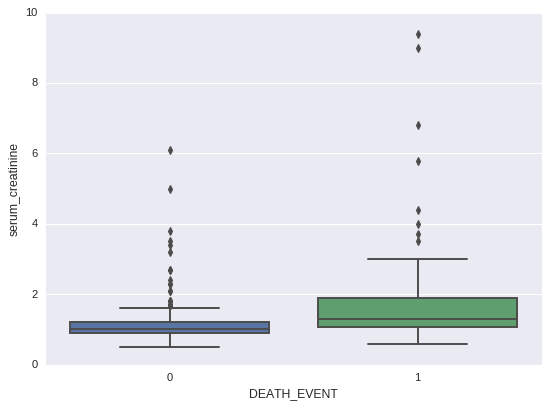

In [40]:
sb.boxplot(x = "DEATH_EVENT", y = "serum_creatinine", data = df);

serum_creatinine is higher in death event cases, so i think it gotta be a factor

### serum_sodium

In [41]:
df.groupby(['DEATH_EVENT'])['serum_sodium'].agg([np.mean]).T

DEATH_EVENT           0        1
mean         137.216749  135.375

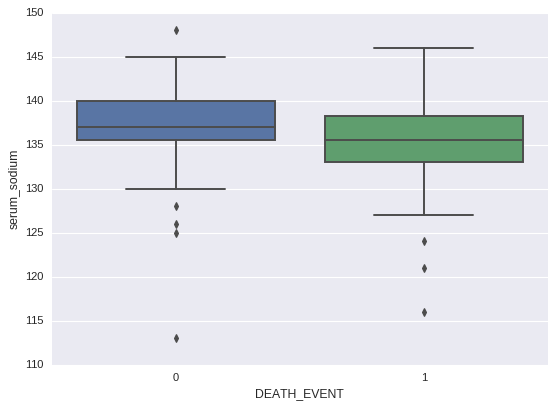

In [42]:
sb.boxplot(x = "DEATH_EVENT", y = "serum_sodium", data = df);

having lower serum_sodium might increase chances of death event

### sex

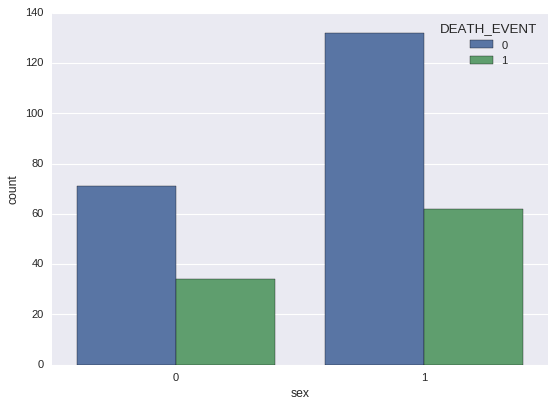

In [43]:
sb.countplot(x='sex', hue='DEATH_EVENT', data=df);

distribution is pretty much same so I guess gender doesn't affect chance of heart failure 

### smoking

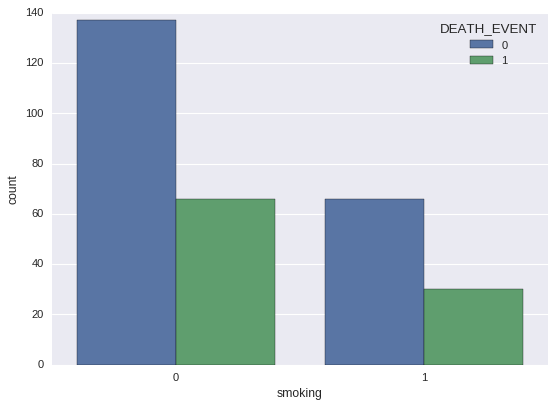

In [44]:
sb.countplot(x='smoking', hue='DEATH_EVENT', data=df);

Surprisingly it seems like smoking doesn't affect it too

### time

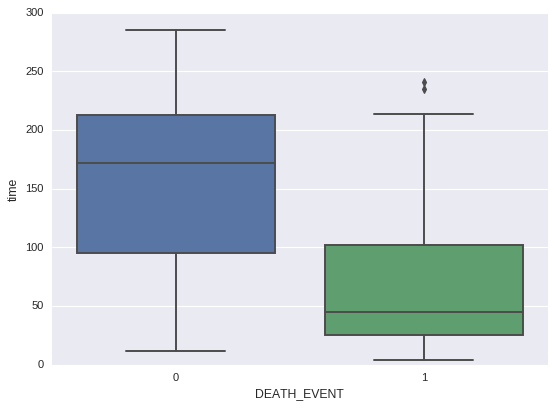

In [45]:
sb.boxplot(x = "DEATH_EVENT", y = "time", data = df);

In [46]:
df.groupby(['DEATH_EVENT'])['time'].agg([np.mean]).T

DEATH_EVENT           0          1
mean         158.339901  70.885417

It seems like death_event occurs early in follow-up period and people who survive 100 days are very unlikely to have heart failure

## Creating new features

### Age bin

In [47]:
df['age_bin'] = pd.cut(df.age,bins=[40,50,60,70,96],labels=['40-50','51-60','61-70','70+'])
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT age_bin  
0        0     4            1     70+  
1        0     6            1   51-60  
2        1     7            1   61-70  
3        0     7            1   40-50  
4        0     8            1   61-70

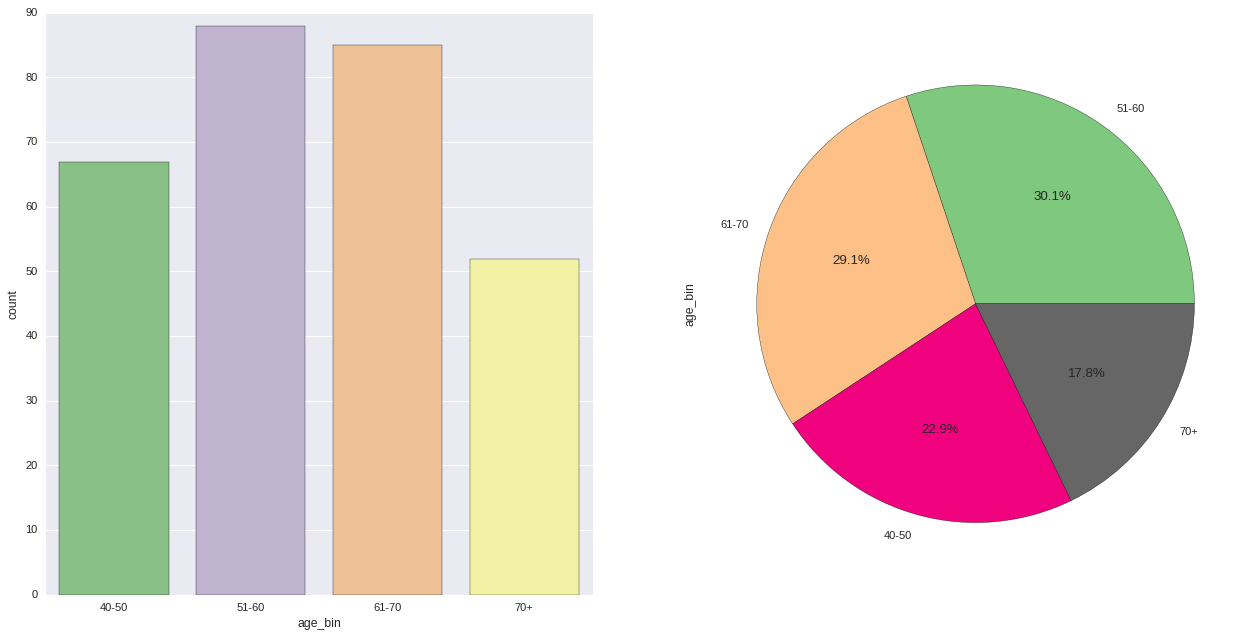

In [48]:
plt.style.use('seaborn')
plt.figure(figsize=(30, 20))
plt.subplot(235)
sb.countplot(df['age_bin'],palette="Accent")
plt.subplot(236)
df['age_bin'].value_counts().plot.pie(cmap="Accent",autopct="%1.1f%%");

now let's check death event dependence on age category

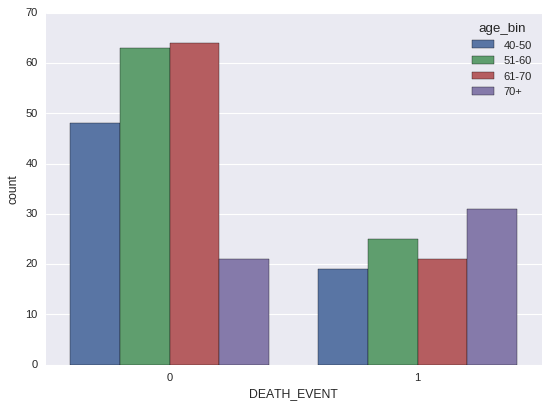

In [49]:
sb.countplot(x='DEATH_EVENT', hue='age_bin', data=df);

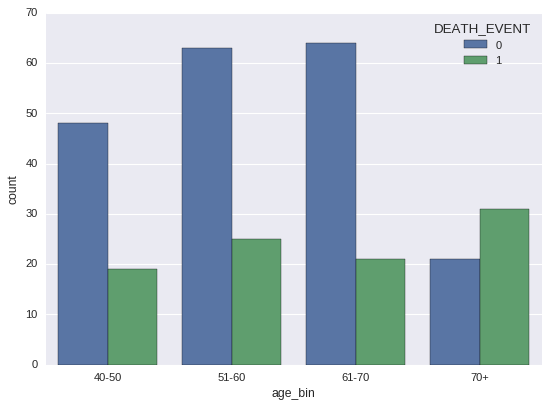

In [50]:
sb.countplot(x='age_bin', hue='DEATH_EVENT', data=df);

It showed us once again that age is important feature for predicting death event, also most of heart failures happens in 70+ bin. and also in 70+ bin death event happens more often than survival. other groups don't give us much information

### Disease

In [51]:
def is_diseased(index):
    if df['anaemia'][index] == 1 or df['diabetes'][index] == 1:
        return 1
    return 0

In [52]:
diseased = []
for i in range(len(df)):
    diseased.append(is_diseased(i))
    
df['is_diseased'] = diseased
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT age_bin  is_diseased  
0        0     4            1     70+            0  
1        0     6            1   51-60            0  
2        1     7            1   61-70            0  
3        0     7            1   40-50            1  
4        0     8            1   61-70            1

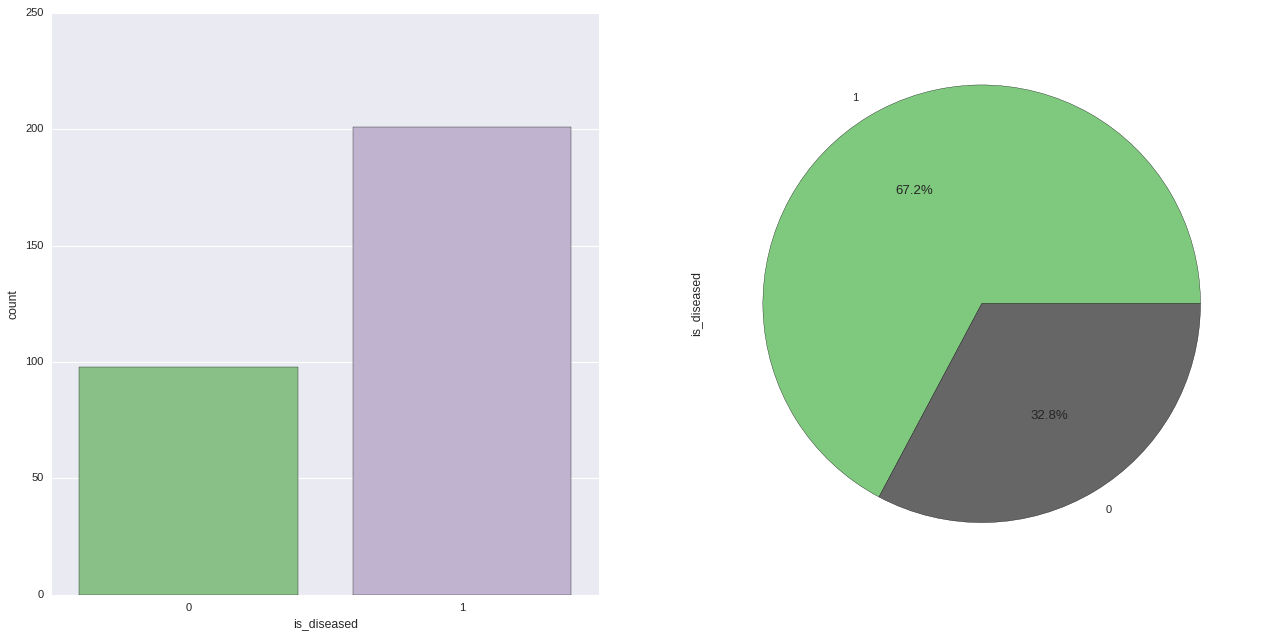

In [53]:
plt.figure(figsize=(30, 20))
plt.subplot(235)
sb.countplot(df['is_diseased'],palette="Accent")
plt.subplot(236)
df['is_diseased'].value_counts().plot.pie(cmap="Accent",autopct="%1.1f%%");

as we can see most of the patients have either anemia or diabetes, or both.

let's check its relation to death event

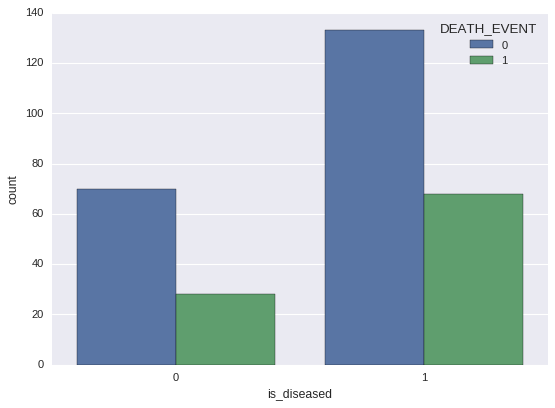

In [54]:
sb.countplot(x='is_diseased', hue='DEATH_EVENT', data=df);

hmm, it looks like being diseased by anaemia or diabetes have almost no effect on death event

### encoding age bins

In [55]:
d = {'40-50':0,'51-60':1,'61-70':2,'70+':3}
df['age_bin'].replace(d, inplace=True)
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  age_bin  is_diseased  
0        0     4            1      3.0            0  
1        0     6            1      1.0            0  
2        1     7            1      2.0            0  
3        0     7            1      0.0            1  
4        0     8            1      2.0            1

## Correlation

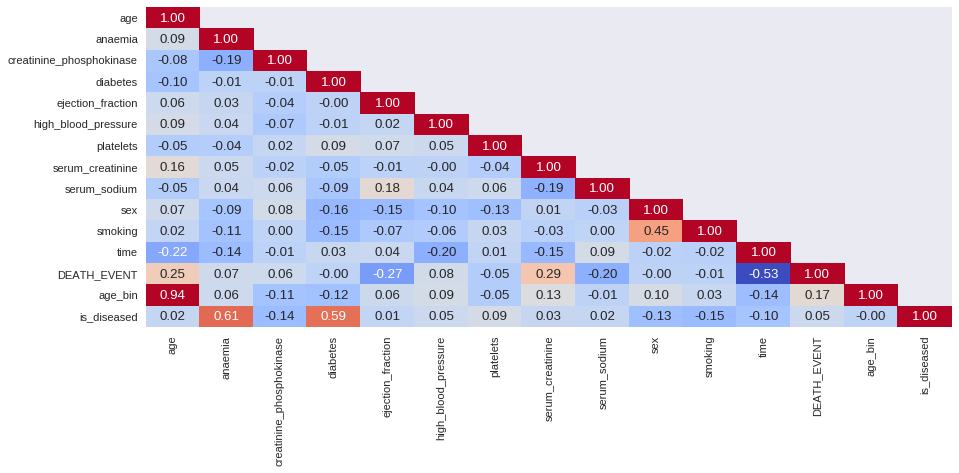

In [56]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(13, 5))
with sb.axes_style("white"):
    sb.heatmap(matrix,mask=np.triu(matrix,1),annot=True,fmt=".2f", vmax=.8,cbar=False,cmap="coolwarm");

This is very important graphic as it tells us what are most imortant features for predicting death event, these are:

- age
- ejection_fraction
- serum_creatinine
- serum_sodium
- time

we don't really need other features for our model, because they will not have much influence on it. So we can drop them

# Data Preprocessing

In [57]:
X = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
Y = df[['DEATH_EVENT']]

### lets divide data into train set and test set(80-20)

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
X_train.head()

Train set: (239, 5) (239, 1)
Test set: (60, 5) (60, 1)


age  ejection_fraction  serum_creatinine  serum_sodium  time
77   42.0                 40               1.2           140    74
58   49.0                 20               1.1           136    55
14   49.0                 30               1.0           138    12
146  52.0                 30               0.7           136   112
181  59.0                 25               1.0           136   150

## Reducing Skewness

1.  for left  skewness, we take squares, cubes or higher powers
2.  for right skewness, we take roots, logarithms or reciprocals (roots are weakest). 

<br>

Skewness formula

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/30324ac725e96b88638a0fc86f201b174082cbc7)

I will try many options and I will leave in notebook one that worked best

### Age

0.42775555782918606


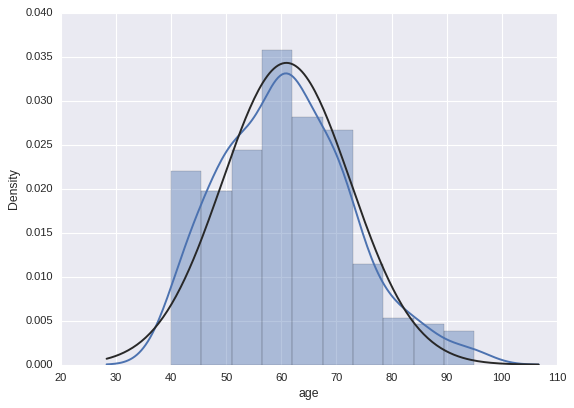

In [59]:
#old skewness
print(X_train['age'].skew())
ax = sb.distplot(X_train['age'],fit=stats.norm)

-0.043158875545639006


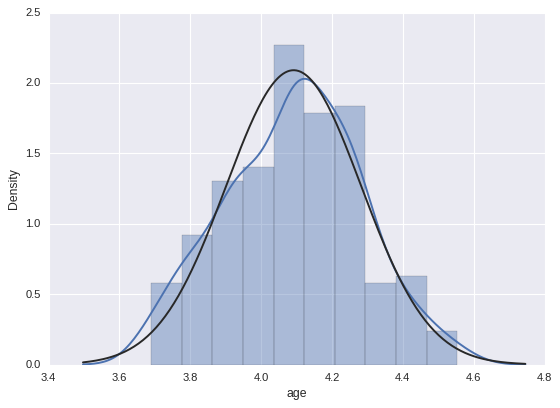

In [60]:
#new skewness
X_train['age'] = np.log(X_train['age'])
print(X_train['age'].skew())
ax = sb.distplot(X_train['age'],fit=stats.norm)

### Ejection fraction

0.5989860191030398


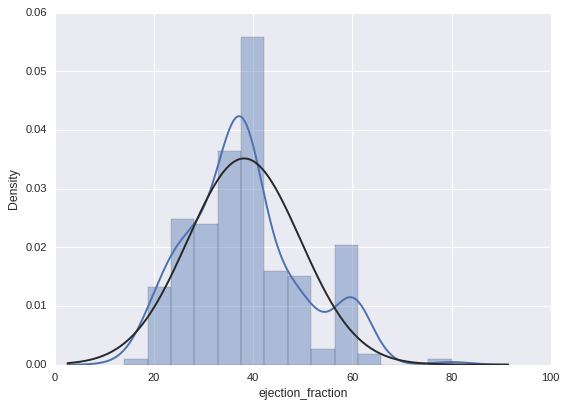

In [61]:
#old skewness
print(X_train['ejection_fraction'].skew())
ax = sb.distplot(X_train['ejection_fraction'],fit=stats.norm)

0.06800000415226158


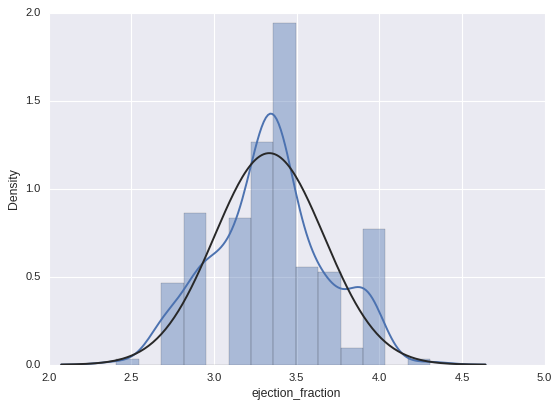

In [62]:
#new skewness
X_train['ejection_fraction'] = np.cbrt(X_train['ejection_fraction'])
print(X_train['ejection_fraction'].skew())
ax = sb.distplot(X_train['ejection_fraction'],fit=stats.norm)

### Serum Creatinine

4.513654827124451


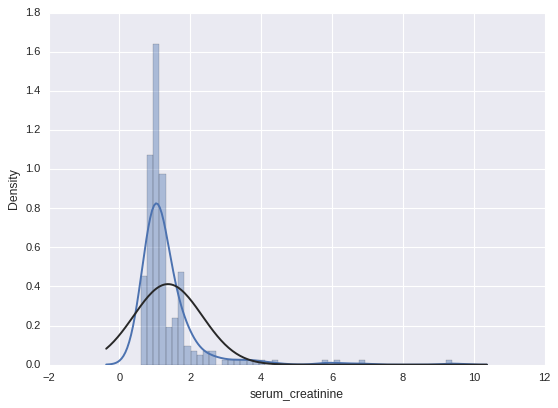

In [63]:
#old skewness
print(X_train['serum_creatinine'].skew())
ax = sb.distplot(X_train['serum_creatinine'],fit=stats.norm)

log function doesn't give that good of a result but I couldn't find better function so this will have to do

1.6555078102661203


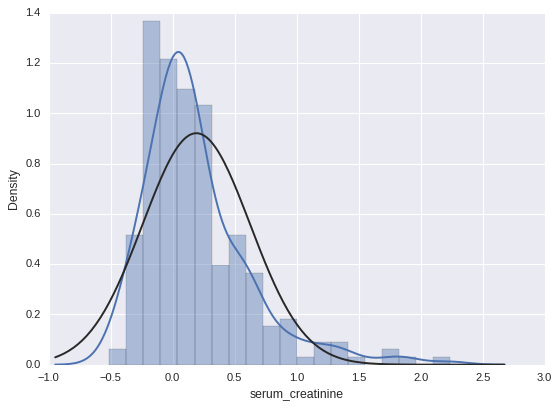

In [64]:
#new skewness
X_train['serum_creatinine'] = np.log(X_train['serum_creatinine'])
print(X_train['serum_creatinine'].skew())
ax = sb.distplot(X_train['serum_creatinine'],fit=stats.norm)

### Serum Sodium

-1.1514074900434506


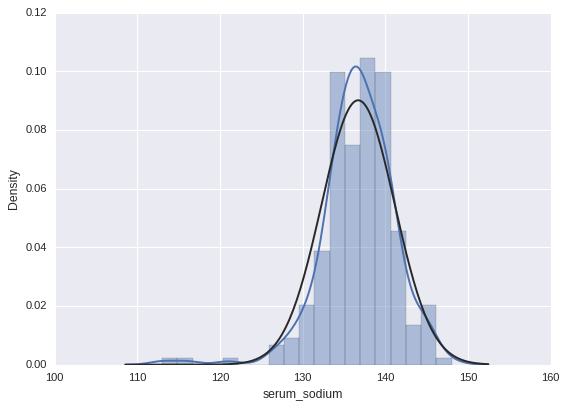

In [65]:
#old skewness
print(X_train['serum_sodium'].skew())
ax = sb.distplot(X_train['serum_sodium'],fit=stats.norm)

Out of many powers of x I have tried 6th power gave the closest result to 0 while others weren't good enough 

-0.04913801944454707


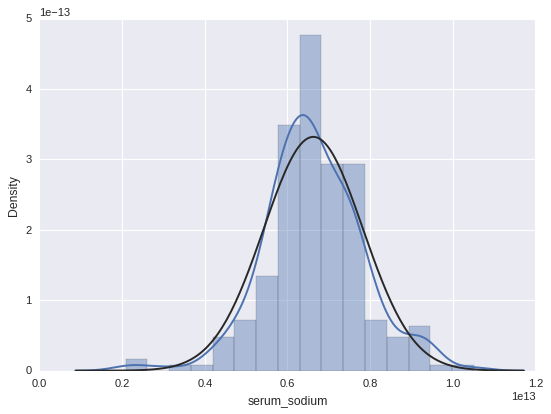

In [66]:
#new skewness
X_train['serum_sodium'] = np.power(X_train['serum_sodium'], 6)
print(X_train['serum_sodium'].skew())
ax = sb.distplot(X_train['serum_sodium'],fit=stats.norm)

## Data Scaling

let's scale variables to be in 0,1 range

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']] = scaler.fit_transform(X_train[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']])
X_test[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']] = scaler.fit_transform(X_test[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']])
X_train.describe()

age  ejection_fraction  serum_creatinine  serum_sodium  \
count  239.000000         239.000000        239.000000    239.000000   
mean     0.465663           0.486951          0.255322      0.539191   
std      0.220992           0.175180          0.157823      0.142826   
min      0.000000           0.000000          0.000000      0.000000   
25%      0.303312           0.367136          0.147360      0.439927   
50%      0.468747           0.501301          0.220290      0.537530   
75%      0.646957           0.603958          0.307936      0.646424   
max      1.000000           1.000000          1.000000      1.000000   

             time  
count  239.000000  
mean     0.455099  
std      0.279179  
min      0.000000  
25%      0.249110  
50%      0.405694  
75%      0.722420  
max      1.000000

In [68]:
X_test.describe()

age  ejection_fraction  serum_creatinine  serum_sodium       time
count  60.000000          60.000000         60.000000     60.000000  60.000000
mean    0.408667           0.412121          0.116706      0.585714   0.430996
std     0.257902           0.247665          0.148565      0.206787   0.274832
min     0.000000           0.000000          0.000000      0.000000   0.000000
25%     0.200000           0.250000          0.047059      0.464286   0.236162
50%     0.400000           0.390909          0.075294      0.619048   0.367159
75%     0.585000           0.545455          0.111765      0.726190   0.683579
max     1.000000           1.000000          1.000000      1.000000   1.000000

### Balancing data

In [69]:
Y_train.value_counts()

DEATH_EVENT
0              163
1               76
dtype: int64

In [70]:
# Use Oversampling to upscale the train data, because our data is too small and unbalanced
sm = SMOTE()
X_train,Y_train =sm.fit_sample(X_train,Y_train)

 `SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.`

Target variable count after sampling

In [71]:
Y_train.value_counts()

DEATH_EVENT
1              163
0              163
dtype: int64

Since, now we have similar number of target values we can train on our model without facing any bias.

## Evaluation Metrics

<img src="https://i.stack.imgur.com/U0hjG.png"/>

<img src="https://research.aimultiple.com/wp-content/uploads/2019/07/positive-negative-true-false-matrix.png" alt="drawing" width="400"/>

**Precision / Sensitivity:** Out of all the `predicted positives`, how many of them are True ones. A low precision means there are many False positives. False positives in our case would mean, we predicted that patient would die but survived.

**Specificity:** Opposite of Precision, correctness of Negative predictions.

**Recall:** Out of all the `actual positives`, how many could you correctly identify. A low recall implies the model has predicted many `false negative` values.

**F1 score:** The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.

# Modeling

## Regularized logistic regression

### Helper functions

In [72]:
# sigmoid function for determining our output class 0 or 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [73]:
# ჩემი დაწერილი რეგულარიზებული ლოჯისტიკური რეგრესიის გრადიენტ დესენტი, რომელშიც მინდოდა ყველაფერი ერთიანად მომექცია, მაგრამ რატომღაც ვერ ავამუშავე და დავანებე თავი.
# def gradient_descent(X, y, alpha=0.0001, lambda_coef=1000, epsilon=0.0000000001):
#     params = X.shape[1]
#     theta = np.matrix(np.zeros(params))
#     X = np.matrix(X)
#     y = np.matrix(y)
    
#     parameters = int(theta.ravel().shape[1])
#     temp = np.matrix(np.zeros(theta.shape))
#     import math
#     prev_cost = math.inf
    
#     while True:
#         error = sigmoid(X * theta.T) - y

#         for i in range(parameters):
#             term = np.multiply(error, X[:,i])
#             m = len(X)
#             if (i == 0):
#                 temp[0,i] = temp[0,i] - alpha * (1 / m) * np.sum(term)
#             else:
#                 temp[0,i] = temp[0,i] - alpha * ((1 / m) * np.sum(term) + (lambda_coef / m) * theta[0,i])
#         theta = temp
#         curr_cost = compute_cost(X, y, theta, lambda_coef)
#         print(curr_cost)
#         if abs(curr_cost - prev_cost) <= epsilon:
#             break
#         prev_cost = curr_cost
    
#     return np.matrix(theta)

In [74]:
# სხვა მიდგომაა, რომელიც წინა ვერსიაში მქონდა, მაგრამ გადავაკეთე კოდი იმის შემდეგ და აღარ ვიყენებ. კოდს ვტოვებ მაინც, საჩვენებლად :D.
# def multivar_linear_regression(theta, X, Y, alpha = 0.08, beta1 = 0.9, beta2 = 0.999, epsilon = 0.01): 
#     prevCost = 0
#     mTheta = np.zeros(theta.shape) 
#     vTheta = np.zeros(theta.shape) 
#     currMTheta = np.zeros(theta.shape) 
#     currVTheta = np.zeros(theta.shape) 
#     t = 0
  
#     while True: 
#         currCost = cost(theta, X, Y, alpha) 
#         if abs(currCost - prevCost) <= epsilon: 
#             break
#         prevCost = currCost 
#         t += 1
#         grad = gradient(theta, X, Y, alpha) 
#         mTheta = beta1 * mTheta + (1-beta1)*grad 
#         vTheta = beta2 * vTheta + (1-beta2)*grad**2
#         currMTheta = mTheta / (1-beta1**t) 
#         currVTheta = vTheta / (1-beta2**t) 
#         change = ((alpha / currVTheta**0.5 + 1e-8) * 
#                  (beta1 * currMTheta + (1-beta1)*grad/(1-beta1**t))) 
#         theta = np.subtract(theta, change) 
#     return theta 

In [75]:
# cost function. On slides it was -(first+second) 
# but in calculating first we use -y and then in calculating cost we use (first - second) so it is same.
# learningRate is lambda from slides
def regularized_cost(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

In [76]:
# one iteration of gradient descent, learningRate is lambda
# grad is parameters change array, so we should subtract grad from theta array and that will be our update
def regularized_gradient(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

In [77]:
# adding space for theta0 -s
X_train.insert(0, 'Ones', 1)
X_test.insert(0, 'Ones', 1)
#setting up theta matrix
params = X_train.shape[1]
theta = np.matrix(np.zeros(params))

## Predictions and testing

### Helper Functions

In [78]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]


In [79]:
def get_results(predictions):
    TP = [1 if (a == 1 and b == 1) else 0 for (a, b) in zip(predictions, Y_test.values)]
    TN = [1 if (a == 0 and b == 0) else 0 for (a, b) in zip(predictions, Y_test.values)]
    FP = [1 if (a == 1 and b == 0) else 0 for (a, b) in zip(predictions, Y_test.values)]
    FN = [1 if (a == 0 and b == 1) else 0 for (a, b) in zip(predictions, Y_test.values)]

    TPNum = sum(map(int, TP))
    TNNum = sum(map(int, TN))
    FPNum = sum(map(int, FP))
    FNNum = sum(map(int, FN))

    precision = TPNum / (TPNum + FPNum)
    recall = TPNum / (TPNum + FNNum)
    F1 = 2 * precision * recall /(precision  + recall)
    accuracy = (TPNum + TNNum) / (TPNum + TNNum + FPNum + FNNum)
    specificity = TNNum / (TNNum + FPNum)

    return precision,recall,F1,accuracy,specificity
#     print("precision = ", precision)
#     print("recall = ", recall)
#     print("F1 = ", F1)
#     print("accuracy = ", accuracy)
#     print("specificity = ", specificity)

In [81]:
results = []
i = 0.1
while i < 10000:
    learning_rate = i/100
    # მესამე სემინარის (1:42:43 - 1:42:56)-ის მიხედვით ამის გამოყენების უფლება გვაქვს.
    theta_min = opt.fmin_tnc(func=regularized_cost, x0=theta, fprime=regularized_gradient, args=(X_train, Y_train, learning_rate))
    theta_min = np.matrix(theta_min[0])
    curr_prediction = predict(theta_min, np.matrix(X_test))
    results.append(get_results(curr_prediction))
    i+= 2.35

In [82]:
best_score = 0
best_result = None
for result in results:
    precision,recall,F1,accuracy,specificity = result
    #let answer be chosen by this formula, why i am giving more weight to recall is explained below.
    result_score = precision + 1.25*recall + F1 + accuracy + specificity
    if result_score > best_score:
        best_score = result_score
        best_result = result


In [83]:
precision,recall,F1,accuracy,specificity = best_result
print("precision = ", precision)
print("recall = ", recall)
print("F1 = ", F1)
print("accuracy = ", accuracy)
print("specificity = ", specificity)

precision =  0.7222222222222222
recall =  0.85
F1 =  0.7906976744186046
accuracy =  0.85
specificity =  0.85


#### In my opinion it is most important to prevent death. For example, if our model predicts that patient is going to die we will place that patient under intensive care. placing patients that have low risk of heart failure under intensive care isn't as bad as letting someone die, so our priority should be maximizing recall. I will leave in this notebook model with maximal recall i could find.

actually, setting learning_rate=1 gives better result 

In [94]:
learning_rate = 1
theta_min = opt.fmin_tnc(func=regularized_cost, x0=theta, fprime=regularized_gradient, args=(X_train, Y_train, learning_rate))
theta_min = np.matrix(theta_min[0])
curr_prediction = predict(theta_min, np.matrix(X_test))
precision,recall,F1,accuracy,specificity = get_results(curr_prediction)
print("precision = ", precision)
print("recall = ", recall)
print("F1 = ", F1)
print("accuracy = ", accuracy)
print("specificity = ", specificity)

precision =  0.7391304347826086
recall =  0.85
F1 =  0.7906976744186046
accuracy =  0.85
specificity =  0.85


### Determining thetas with normal equation method

In [95]:
lambda_coef = 1
almost_identity = np.identity(X_train.shape[1])
almost_identity[0,0] = 0
almost_identity = lambda_coef * almost_identity
XTX = np.matrix(X_train).T * np.matrix(X_train)
to_be_inversed = np.add(XTX, almost_identity)
inversed = np.linalg.inv(np.matrix(to_be_inversed))
next_step = inversed * np.matrix(X_train).T
normal_thetas = next_step * np.matrix(Y_train)
normal_thetas

matrix([[ 0.95155935],
        [ 0.37374273],
        [-0.70504967],
        [ 0.51034589],
        [-0.2603023 ],
        [-0.79176641]])

In [96]:
predictions = predict(np.matrix(normal_thetas).T, np.matrix(X_test))
precision,recall,F1,accuracy,specificity = get_results(predictions)
print("precision = ", precision)
print("recall = ", recall)
print("F1 = ", F1)
print("accuracy = ", accuracy)
print("specificity = ", specificity)

precision =  0.38461538461538464
recall =  1.0
F1 =  0.5555555555555556
accuracy =  0.4666666666666667
specificity =  0.2


I don't like the results. let's check if it really is a solution

In [97]:
Y_should_be = np.matrix(X_train) * normal_thetas

In [98]:
print(np.matrix(Y_should_be) == np.matrix(Y_train))

[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 

it looks like my implementation of normal equation is wrong.

In [99]:
to_be_inversed * inversed

matrix([[ 1.00000000e+00,  0.00000000e+00, -2.22044605e-16,
         -3.55271368e-15,  1.55431223e-15,  0.00000000e+00],
        [ 8.88178420e-16,  1.00000000e+00, -2.77555756e-16,
         -1.77635684e-15,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         -8.88178420e-16,  1.99840144e-15,  0.00000000e+00],
        [-4.44089210e-16,  0.00000000e+00,  2.49800181e-16,
          1.00000000e+00,  8.88178420e-16,  4.44089210e-16],
        [ 3.55271368e-15,  0.00000000e+00, -4.44089210e-16,
         -2.66453526e-15,  1.00000000e+00, -4.44089210e-16],
        [ 0.00000000e+00,  8.88178420e-16,  6.66133815e-16,
          0.00000000e+00,  1.77635684e-15,  1.00000000e+00]])

everything is good until this point, inverted matrix seems wrong. product of those two matrices isnt identity matrix. I don't know how to fix it, slide said to_be_iversed matrix should always be invertible. 

# ----------------------------------------------THE END----------------------------------------------